In [1]:
import tensorflow

In [2]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adagrad, Adam

import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [3]:
class LeNet:
    @staticmethod
    def build(input_shape):
        model = Sequential()
        model.add(Conv2D(16, kernel_size=3, padding="same",
                        input_shape = input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

        model.add(Conv2D(32, kernel_size=5, padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


        model.add(Conv2D(128, kernel_size=5, padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        model.add(Dense(10))
        model.add(Activation("softmax"))
        return model



In [4]:
epochs= 20
batch_size = 128
optimizer = Adam()
validation_split = 0.2
img_rows, img_cols = 28, 28
input_shape = (img_cols, img_rows, 1)

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

X_train /= 255
X_test /= 255


In [6]:
X_train = X_train[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]


print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")


60000 train samples
10000 test samples


In [7]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10 )

In [9]:
model = LeNet.build(input_shape)

model.compile(loss="categorical_crossentropy",
             optimizer = optimizer,
             metrics = ["accuracy", "mse"])
a model.fit(X_train, y_train, batch_size= batch_size, 
                    epochs= epochs, validation_split= validation_split)

In [11]:
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s      

In [12]:
score

[0.037012540881722455, 0.99209999999999998, 0.0012211447874730613]

In [13]:
print("Test score:", score[0])
print("Test accuracy:", score[1])


Test score: 0.0370125408817
Test accuracy: 0.9921


In [14]:
print(a.history.keys())

dict_keys(['loss', 'val_acc', 'mean_squared_error', 'val_mean_squared_error', 'val_loss', 'acc'])


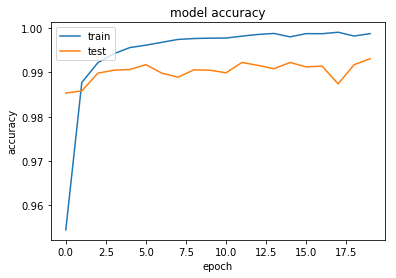

In [16]:
plt.plot(a.history['acc'])
plt.plot(a.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

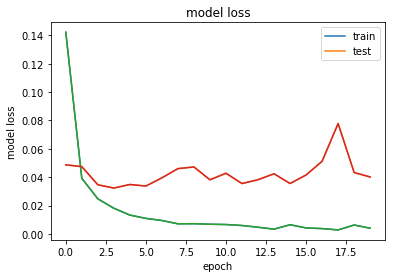

In [18]:
plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('model loss')
plt.legend(['train', 'test'], loc="upper right")
plt.show()